In [ ]:
#Spam_classifier
#Spam/Not-Spam = 0/1
#import libraried

In [ ]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [ ]:
df = pd.read_csv('/content/emails.csv')
df.head(5)

In [ ]:
df.shape

(5728, 2)

In [ ]:
df.drop_duplicates(inplace=True)  #remove duplicate texts
df.shape

(5695, 2)

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#1.remove punc, 2.stopwords 3.list of clean text
def text_process(text):
  nop = [char for char in text if char not in string.punctuation]
  nop = ''.join(nop)
  clean_words = [word for word in nop.split() if word.lower() not in stopwords.words('english')]
  return clean_words

In [ ]:
#tokenazion
df['text'].head().apply(text_process)

0    [Subject, naturally, irresistible, corporate, ...
1    [Subject, stock, trading, gunslinger, fanny, m...
2    [Subject, unbelievable, new, homes, made, easy...
3    [Subject, 4, color, printing, special, request...
4    [Subject, money, get, software, cds, software,...
Name: text, dtype: object

In [ ]:
#Example text convert to matrix and tokens  #not related to the actual
message4 = 'hello world hello hello world'
message5 = 'test test test one hello'
print(message4)

#convert the text to matrix tokens
wrds4 = CountVectorizer(analyzer=text_process).fit_transform([[message4],[message5]])
print(wrds4)
print()
print(wrds4.shape)

hello world hello hello world
  (0, 0)	3
  (0, 3)	2
  (1, 0)	1
  (1, 2)	3
  (1, 1)	1

(2, 4)


In [ ]:
#back to our dataset
message_bow = CountVectorizer(analyzer=text_process).fit_transform(df['text'])


In [ ]:
#split into train and test data
X_train, X_test, y_train, y_test = train_test_split(message_bow,df['spam'],test_size=0.20,random_state=0)

In [ ]:
print(message_bow.shape)

(5695, 37229)


In [ ]:
#prediction multi-nomial naive bayes classification
classifier = MultinomialNB().fit(X_train,y_train)
pred = classifier.predict(X_train)
print(pred)


[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
pred = classifier.predict(X_train)
print(classification_report(y_train,pred))
print('Accuracy:', accuracy_score(y_train,pred
                                  ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3457
           1       0.99      1.00      0.99      1099

    accuracy                           1.00      4556
   macro avg       0.99      1.00      1.00      4556
weighted avg       1.00      1.00      1.00      4556

Accuracy: 0.9971466198419666


In [ ]:
pred_test = classifier.predict(X_test)
print(classification_report(y_test,pred_test))
print('Accuracy:',accuracy_score(y_test,pred_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       870
           1       0.97      1.00      0.98       269

    accuracy                           0.99      1139
   macro avg       0.98      0.99      0.99      1139
weighted avg       0.99      0.99      0.99      1139

Accuracy: 0.9920983318700615


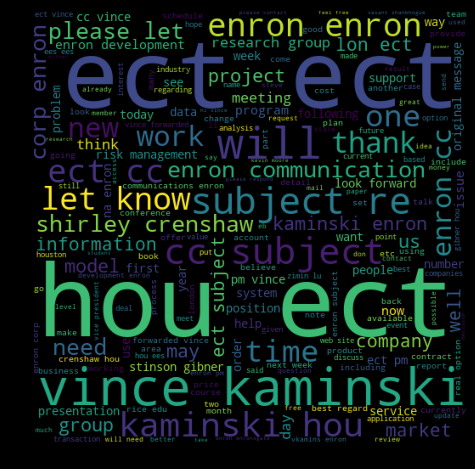

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
spam_wrd = ''.join(list(df['text']))
spam_wc = WordCloud(width=512,height=512).generate(spam_wrd)
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_wc)
plt.show()

In [ ]:
!pip install wordcloud